In [2]:
import sys

sys.path.append('/mnt/sdceph/users/nroy/radmc3d-2.0/python/radmc3dPy')
sys.path.append('/mnt/home/nroy/test/chimes-IGNIS/chimes-driver/ext-lib/pfh_python')

#from simpleplot import *
#from radmc3dPy import image
#from gizmopy.load_from_snapshot import load_from_snapshot
#from gizmopy.load_fire_snap import load_fire_snap
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.facecolor']='w'


params = {"text.color" : 'k',
          "ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}

plt.rcParams.update(params)

'''
for generalization, see "#CHANGE" throughout code on lines where needs change depending on emission line instance (ctrl+f tofind and change quickly), most changes should be covered by changing the parent variable below.
''';

In [5]:
parent_face = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/CII/"
parent_edge = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/CII/edge-on/"

In [6]:
filepath_tot = parent_face + 'image_tot.hdf5'
filepath_con = parent_face + 'image_continuum.hdf5'
file_con = h5.File(filepath_con,'r')
file_tot = h5.File(filepath_tot,'r')

npix_x = np.shape(file_tot['image_array'][:])[0]
npix_y = np.shape(file_tot['image_array'][:])[1]

image_array = file_tot['image_array'][:] - file_con['image_array'][:]

image_array[image_array < 0] = 0

frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)

#moment 0
integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

integrated_image_array_moment0[0,0] = 0 #final moment 0 array
moment_0_face = np.asarray(integrated_image_array_moment0) 

#moment 1
N = np.size(frequency_array)
velocity_arr = np.linspace(-1000, 1000, N)

moment1_noint = velocity_arr * image_array

integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

integrated_image_array_moment1[0,0] = 0

isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
isolate_moment_1[0,0] = 0 #final moment 1 array
moment_1_face = np.asarray(isolate_moment_1) 

#moment 2
isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

for i in range(len(velocity_arr)):
    for j in range(len(image_array)):
        for k in range(len(image_array)):
            isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

integrated_image_array_moment2[0,0] = 0

isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
isolate_moment_2[0,0] = 0

isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
moment_2_face = np.asarray(isolate_moment_2) 

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


In [7]:
filepath_tot = parent_edge + 'image_tot.hdf5'
filepath_con = parent_edge + 'image_continuum.hdf5'
file_con = h5.File(filepath_con,'r')
file_tot = h5.File(filepath_tot,'r')

npix_x = np.shape(file_tot['image_array'][:])[0]
npix_y = np.shape(file_tot['image_array'][:])[1]

image_array = file_tot['image_array'][:] - file_con['image_array'][:]

image_array[image_array < 0] = 0

frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)

#moment 0
integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

integrated_image_array_moment0[0,0] = 0 #final moment 0 array
moment_0_edge = np.asarray(integrated_image_array_moment0) 

#moment 1
N = np.size(frequency_array)
velocity_arr = np.linspace(-1000, 1000, N)

moment1_noint = velocity_arr * image_array

integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

integrated_image_array_moment1[0,0] = 0

isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
isolate_moment_1[0,0] = 0 #final moment 1 array
moment_1_edge = np.asarray(isolate_moment_1) 

#moment 2
isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

for i in range(len(velocity_arr)):
    for j in range(len(image_array)):
        for k in range(len(image_array)):
            isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

integrated_image_array_moment2[0,0] = 0

isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
isolate_moment_2[0,0] = 0

isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
moment_2_edge = np.asarray(isolate_moment_2) 

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


In [8]:
'''CALCULATIONS FOR V/SIGMA'''

r = 128 # given 1/2 mass radius
tolerance = 2 # CHANGE depending on accuracy we want
r_range = np.arange(0, 128)

#FACE ON
numerator_face = moment_0_face * ((moment_1_face)*(moment_1_face))
denominator_face = moment_0_face * ((moment_2_face)*(moment_2_face))

midpointx_face = len(numerator_face) / 2
midpointy_face = len(numerator_face[0]) / 2

half_numface = []
half_denomface = [] 
for i in range(len(numerator_face)):
    for j in range(len(numerator_face[i])): 
        x = i - midpointx_face
        y = j - midpointy_face
        dist = np.sqrt(x**2 + y**2)
        if dist <= r:
            half_numface.append(numerator_face[i][j])
            half_denomface.append(denominator_face[i][j])
        

v_sigma_sq_face = (np.sum(half_numface))/(np.sum(half_denomface))

v_sigma_face = np.sqrt(v_sigma_sq_face)



#NaN Catcher face-on
if np.isnan(v_sigma_face):
    if np.isnan(v_sigma_sq_face):
        if np.isnan(np.sum(numerator_face)):
            numerator_face[np.isnan(numerator_face)] = 0
        if np.isnan(np.sum(denominator_face)):
            denominator151[np.isnan(denominator_face)] = 0
    v_sigma_sq_face = (np.sum(numerator_face))/(np.sum(denominator_face))
    v_sigma_face = np.sqrt(v_sigma_sq_face)


print("Face on L.o.S. =", v_sigma_face)

'''
- All of the above is what needs to be done for 151, 152, and 155. 
- condense into one for loop for a snapshot list, then save final v_sigma value in unique variable name
- should be able at some point to read in hdf5 file for each snapshot, pull data from there, and go straight 
    to this calculation
'''

#EDGE ON
numerator_edge = moment_0_edge * ((moment_1_edge)*(moment_1_edge))
denominator_edge = moment_0_edge * ((moment_2_edge)*(moment_2_edge))

midpointx_edge = len(numerator_edge) / 2
midpointy_edge = len(numerator_edge[0]) / 2

half_numedge = []
half_denomedge = [] 
for i in range(len(numerator_edge)):
    for j in range(len(numerator_edge[i])): 
        x = i - midpointx_edge
        y = j - midpointy_edge
        dist = np.sqrt(x**2 + y**2)
        if dist <= r:
            half_numedge.append(numerator_edge[i][j])
            half_denomedge.append(denominator_edge[i][j])
        

v_sigma_sq_edge = (np.sum(half_numedge))/(np.sum(half_denomedge))

v_sigma_edge = np.sqrt(v_sigma_sq_edge)



#NaN Catcher edge-on
if np.isnan(v_sigma_edge):
    if np.isnan(v_sigma_sq_edge):
        if np.isnan(np.sum(numerator_edge)):
            numerator_edge[np.isnan(numerator_edge)] = 0
        if np.isnan(np.sum(denominator_edge)):
            denominator151[np.isnan(denominator_edge)] = 0
    v_sigma_sq_edge = (np.sum(numerator_edge))/(np.sum(denominator_edge))
    v_sigma_edge = np.sqrt(v_sigma_sq_edge)


print("Edge on L.o.S. =", v_sigma_edge)

Face on L.o.S. = 0.9833358757712731
Edge on L.o.S. = 2.4098652388969493


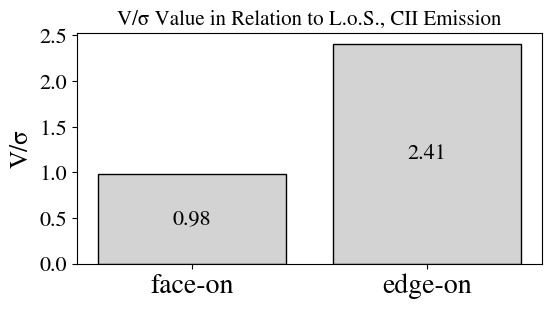

In [9]:
'''PLOTTING'''

x_axis = ['face-on', 'edge-on'] #snapshots

present_face = round(v_sigma_face, 2)
present_edge = round(v_sigma_edge, 2)

y_axis = [present_face, present_edge] #values

fig, ax = plt.subplots(figsize = (6, 3))
barplot = ax.bar(x = x_axis, height = y_axis, fc = "lightgray", ec = "black")
ax.bar_label(barplot, labels = y_axis, label_type = "center", fontsize = 16)

#for index, value in enumerate(y_axis):
   # plt.text(value, index, str(value))
plt.yticks(fontsize=16)
plt.xticks(fontsize=20)
plt.title('V/σ Value in Relation to L.o.S., CII Emission', fontsize = 15) #change
plt.xlabel('', fontsize = 18)
plt.ylabel('V/σ', fontsize = 18)
plt.show()